In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('../../data/processed/WESAD/WESAD_with_focus.csv', index_col=0)

In [3]:
df_all.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1


In [5]:
df_all.describe()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000
mean,12.720508,-1.946556,17.685414,63.678784,2.445907,1.825292,0.041838,-0.000052,22.054681,2.138539,86.705055,754.312346,226.692259,172.462442,66.754311,9.806157,1.751628,9.361860,0.553488
std,42.573774,24.544272,27.006574,0.895283,2.489792,2.313034,0.076492,0.001697,2.619974,1.107775,14.158740,117.988142,71.663630,52.169170,19.407980,29.836594,1.011427,4.675726,0.497362
min,-65.119333,-60.540000,-61.548000,62.283237,0.038691,0.092480,0.001103,-0.008301,16.181853,1.140682,52.876293,440.998134,17.803216,15.772932,0.000000,0.122539,1.000000,2.000000,0.000000
25%,-35.781667,-17.497333,1.159000,63.011447,0.555793,0.293286,0.003218,-0.000290,20.019066,1.524772,76.168102,671.164773,182.203574,140.396154,57.275132,1.598113,1.000000,5.000000,0.000000
50%,30.260000,-1.470667,19.965333,63.314310,1.753894,0.779729,0.011373,-0.000026,22.168906,1.773336,85.897846,749.198718,232.027384,176.307428,71.875000,3.487934,1.000000,9.000000,1.000000
75%,48.004667,11.447333,38.665000,64.394251,3.312680,2.740940,0.043703,0.000061,24.025327,2.262529,96.685877,828.565228,274.790674,205.068612,81.016731,8.746810,2.000000,14.000000,1.000000
max,63.026667,63.827333,62.902000,68.620890,19.468816,14.787926,0.806699,0.021294,28.422274,10.249264,137.440788,1139.423077,458.236547,336.454123,100.000000,707.930928,4.000000,17.000000,1.000000


### Check missing value

In [4]:
missing_value_count = df_all.isnull().sum()
missing_value_count

ACC_x_mean         0
ACC_y_mean         0
ACC_z_mean         0
net_acc_mean       0
net_acc_std        0
EDA_mean           0
EDA_std            0
EDA_slope          0
RESP_rate          0
RESP_regularity    0
HR                 0
IBI                0
RMSSD              0
SDNN               0
pNN50              0
lf/hf              0
label              0
subject            0
focus_label        0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
selected_features = [
    'ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean',
    'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf'
]

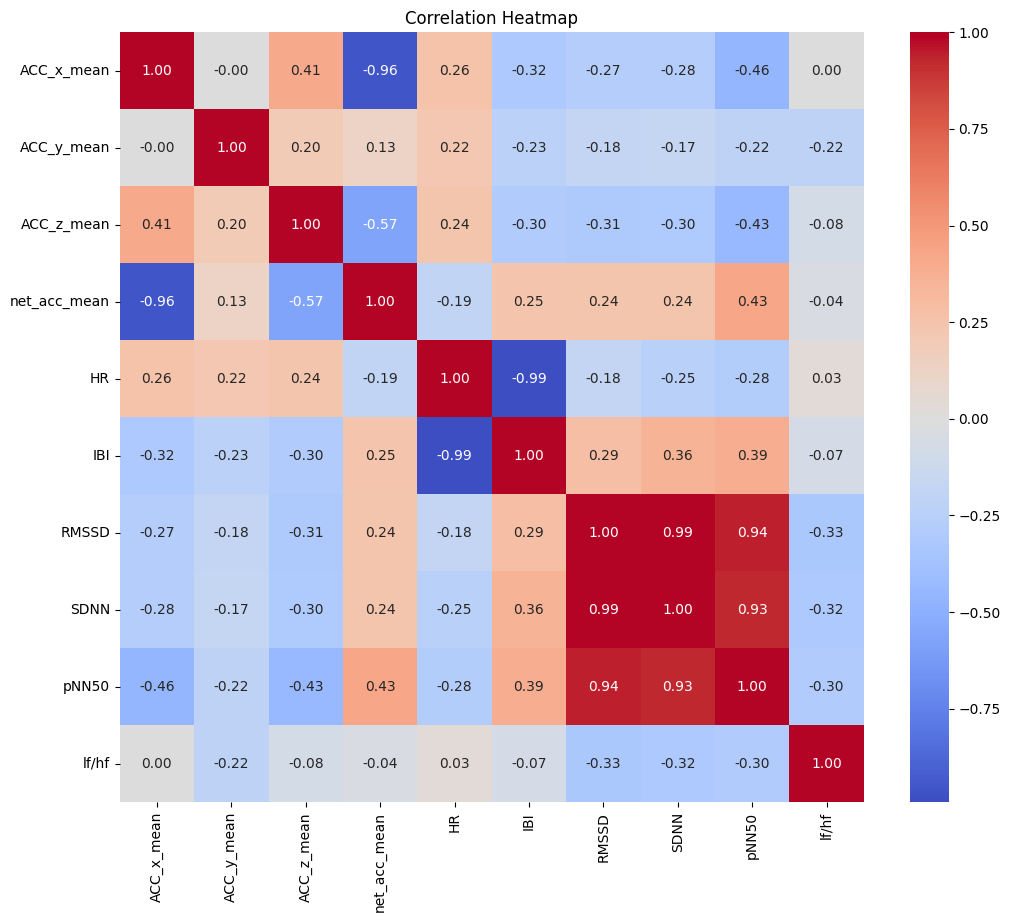

In [7]:
feature_only = df_all[selected_features].corr()
# Heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(feature_only.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X = df_all[selected_features]
y = df_all.focus_label

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        96
           1       0.76      0.76      0.76       119

    accuracy                           0.73       215
   macro avg       0.73      0.73      0.73       215
weighted avg       0.73      0.73      0.73       215



In [14]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

In [15]:
print(f'Train score\t: {train_score}')
print(f'Test score\t: {test_score}')

Train score	: 1.0
Test score	: 0.7302325581395349


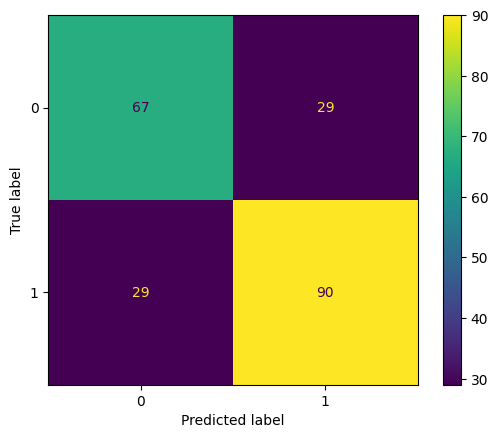

In [16]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Try using feature from heart only

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [6]:
selected_features = [
    'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf'
]

In [7]:
X = df_all[selected_features]
y = df_all.focus_label

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
model = XGBClassifier()

In [12]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        96
           1       0.71      0.71      0.71       119

    accuracy                           0.68       215
   macro avg       0.68      0.68      0.68       215
weighted avg       0.68      0.68      0.68       215



## Deep learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('../../data/processed/WESAD/WESAD_with_focus.csv', index_col=0)

In [3]:
features = ['HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf']

In [4]:
X = df[features]
y = df.focus_label

In [5]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = Sequential([
    Dense(units=1024, activation='relu', input_shape=[6]),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', Precision(), Recall()])

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
model.fit(X_train, y_train, validation_split=0.2,
          epochs=100, batch_size=16,
          callbacks=[early_stop], verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5301 - loss: 42.0600 - precision_1: 0.5629 - recall_1: 0.7383 - val_accuracy: 0.6047 - val_loss: 2.8321 - val_precision_1: 0.6064 - val_recall_1: 0.6477
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.5481 - loss: 17.8067 - precision_1: 0.5946 - recall_1: 0.6600 - val_accuracy: 0.6744 - val_loss: 0.9529 - val_precision_1: 0.6818 - val_recall_1: 0.6818
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5190 - loss: 11.6794 - precision_1: 0.5670 - recall_1: 0.5883 - val_accuracy: 0.5581 - val_loss: 2.3281 - val_precision_1: 0.5366 - val_recall_1: 1.0000
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.5363 - loss: 7.5899 - precision_1: 0.5753 - recall_1: 0.6075 - val_accuracy: 0.6512 - val_loss: 0.7750 - val_precision_1: 0.6591 - val_recall_1: 0.6591
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5135 - loss: 6.0823 - precision_1: 0.5653 - recall_1: 0.

In [16]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.5177 - loss: 0.6586 - precision_1: 0.7212 - recall_1: 0.2168


[0.6827995777130127,
 0.49302324652671814,
 0.6785714030265808,
 0.1596638709306717]